# HW3_Yue Shuai_3036226

# 4_3

In [1]:
%matplotlib inline

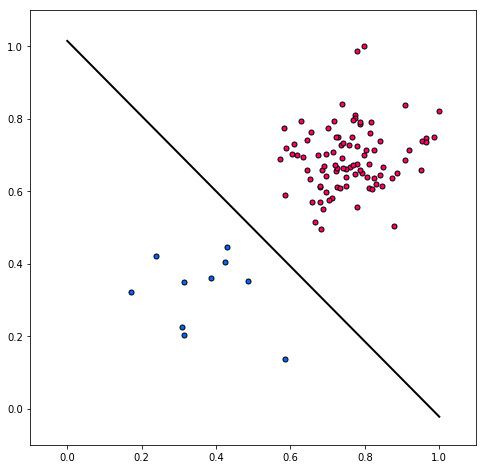

In [4]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import matplotlib.pyplot as plt
import csv

# sigmoid for softmax/logistic regression minimization
def sigmoid(z): 
    y = 1/(1+np.exp(-z))
    return y
    
# import training data 
def load_data(csvname):
    # load in data
    reader = csv.reader(open(csvname, "r"), delimiter=",")
    d = list(reader)

    # import data and reshape appropriately
    data = np.array(d).astype("float")
    X = data[:,0:2]
    y = data[:,2]
    y.shape = (len(y),1)
    
    # pad data with ones for more compact gradient computation
    o = np.ones((np.shape(X)[0],1))
    X = np.concatenate((o,X),axis = 1)
    X = X.T
    
    return X,y

# YOUR CODE GOES HERE - create a gradient descent function for softmax 
# cost/logistic regression 
def softmax_grad(X,y):
    w1 = w0
    alpha = alpha0
    w_path = [] 
    max_its = 2000
    for k in range(max_its):  
        t1 = y*np.dot(X.T,w1)
        grad = -np.dot(X,sigmoid(-t1)*y)
        w1 = w1 - alpha*grad
        
        w_path.append(w1)
    w_path = np.asarray(w_path)
    w_path.shape = (np.shape(w_path)[0],3)
    return w_path

# plots everything 
def plot_all(X,y,w):
    # custom colors for plotting points
    red = [1,0,0.4]  
    blue = [0,0.4,1]
    
    # scatter plot points
    fig = plt.figure(figsize = (8,8))
    ind = np.argwhere(y==1)
    ind = [s[0] for s in ind]
    plt.scatter(X[1,ind],X[2,ind],color = red,edgecolor = 'k',s = 25)
    ind = np.argwhere(y==-1)
    ind = [s[0] for s in ind]
    plt.scatter(X[1,ind],X[2,ind],color = blue,edgecolor = 'k',s = 25)
    plt.grid('off')
    
    # plot separator
    s = np.linspace(0,1,100) 
    plt.plot(s,(-w[0]-w[1]*s)/w[2],color = 'k',linewidth = 2)
    
    # clean up plot
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.show()
    
# load in data
X,y = load_data('/Users/Administrator/Desktop/python/imbalanced_2class.csv')

w0 = np.array([0,2,2])
w0.shape = (3,1)
alpha0 = 10**(-1)

# run gradient descent
w_final = softmax_grad(X,y)
w=w_final[-1]
# plot points and separator
plot_all(X,y,w)
plt.show()

# 4_9

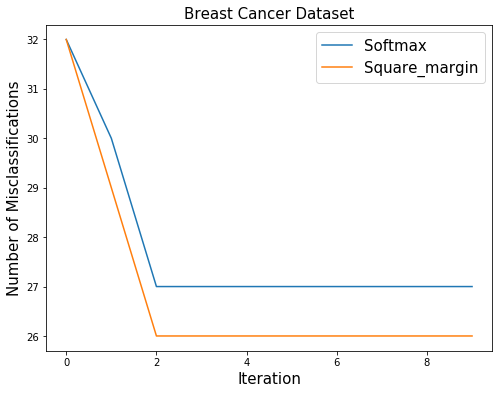

In [5]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import matplotlib.pyplot as plt
import csv

# sigmoid for softmax/logistic regression minimization
def sigmoid(z): 
    y = 1/(1+np.exp(-z))
    return y
    
# import training data 
def load_data(csvname):
    # load in data
    reader = csv.reader(open(csvname, "r"), delimiter=",")
    d = list(reader)

    # import data and reshape appropriately
    data = np.array(d).astype("float")
    X = data[:,0:8]
    y = data[:,8]
    y.shape = (len(y),1)
    
    # pad data with ones for more compact gradient computation
    o = np.ones((np.shape(X)[0],1))
    X = np.concatenate((o,X),axis = 1)
    X = X.T
    return X,y

# YOUR CODE GOES HERE - create a gradient descent function for softmax 
# cost/logistic regression 
def softmax_grad(X,y, w0):
    w1 = w0
    alpha = alpha0
    w_path = [] 
    max_its = 10
    mis = []
    steps = []
    for k in range(max_its):  
        t_temp = y*np.dot(X.T,w1)
        grad =  -np.dot(X,sigmoid(-t_temp)*y)
        
        r_temp = sigmoid(-t_temp)*(1-sigmoid(-t_temp))
        r_temp = r_temp.T
        r_ = np.diag(r_temp[0])
        hess = np.dot(np.dot(X,r_),X.T)
        
        w1 = w1 - np.dot(np.linalg.pinv(hess),grad)
        
        pred_label = np.dot(X.T[:,:], w1)
        pred_label[pred_label>0] = 1
        pred_label[pred_label<=0]  = -1
        mis.append(sum(pred_label!= y))
        
    return mis


def square_margin(X,y,w0):
    w1 = w0
    alpha = alpha0
    w_path = [] 
    max_its = 10
    mis = []
    steps = []
    for k in range(max_its):  
        t_temp = 1 - y*np.dot(X.T,w1)
        t_temp[t_temp<0]=0
        grad = np.dot(X, -2 * t_temp *y)
        thre =  1-y*np.dot(X.T, w1)
        keep = []
        for x in range(thre.shape[0]):
            if (thre[x]>0): keep.append(x)
                
        filtered_X = X[:, keep]
        hess = 2 * np.dot(filtered_X, filtered_X.T)
        w1 = w1 - np.dot(np.linalg.pinv(hess),grad)

        pred_label = np.dot(X.T[:,:], w1)
        pred_label[pred_label>0] = 1
        pred_label[pred_label<=0]  = -1
        mis.append(sum(pred_label!= y))
        
    return mis


# load in data
X,y = load_data('/Users/Administrator/Desktop/python/breast_cancer_data.csv')

fig, ax= plt.subplots(1,1,figsize=(8,6))

ini = 0.000001
w0 = np.array([ini,ini,ini,ini,ini,ini,ini,ini,ini])
w0.shape = (9,1)
alpha0 = 750

# run gradient descent
mis_square = square_margin(X,y,w0)
#print (mis_square)
mis_softmax = softmax_grad(X,y,w0)
# print (mis_softmax)

ax.plot(range(10), mis_softmax, label='Softmax')
ax.plot(range(10), mis_square, label='Square_margin')
ax.set_xlabel('Iteration',fontsize=15)
ax.set_ylabel('Number of Misclassifications',fontsize=15)
ax.set_title('Breast Cancer Dataset',fontsize=15)

ax.legend(fontsize=15)
plt.show()

# 4_16

In [2]:
import csv
import numpy as np

def sigmoid(t):
    return 1/(1 + np.exp(-t))

def checkSize(w, X, y):
    # w and y are column vector, shape [N, 1] not [N,]
    # X is a matrix where rows are data sample
    assert X.shape[0] == y.shape[0]
    assert X.shape[1] == w.shape[0]
    assert len(y.shape) == 2
    assert len(w.shape) == 2
    assert w.shape[1] == 1
    assert y.shape[1] == 1

def compactNotation(X):
    return np.hstack([np.ones([X.shape[0], 1]), X])

def readData(path):
    """
    Read data from path (either path to MNIST train or test)
    return X in compact notation (has one appended)
    return Y in with shape [10000,1] and starts from 0 instead of 1
    """
    reader = csv.reader(open(path, "r"), delimiter=",")
    d = list(reader)
    data = np.array(d).astype("float")
    X = data[:,0:-1]
    y = data[:,-1]
    y.shape = (len(y),1)

    # pad data with ones for more compact gradient computation
    o = np.ones((np.shape(X)[0],1))
    X = np.concatenate((o,X),axis = 1)
#     X = X.T
    
    return X,y

def softmaxGrad(w, X, y):
    checkSize(w, X, y)
    ### RETURN GRADIENT
    t1 = y*np.dot(X,w)
    grad = -np.dot(X.T,sigmoid(-t1)*y)
    return grad

def accuracy(OVA, X, y):
    """
    Calculate accuracy using matrix operations!
    """
    
    pred_vector = np.dot(X[:,:], OVA)
    pred_label  = np.argmax(pred_vector, axis =1)
    pred_label = pred_label.reshape(X.shape[0],1)
    acc_ = sum(pred_label==y)
    acc = float(acc_) / X.shape[0] 
    
    return acc
    

def gradientDescent(grad, w0, *args, **kwargs):
    max_iter = 5000
    alpha = 0.001
    eps = 10^(-5)

    w = w0
    iter = 0
    while True:
        gradient = grad(w, *args)
        w = w - alpha * gradient

        if iter > max_iter or np.linalg.norm(gradient) < eps:
            break

        if iter  % 1000 == 1:
            print("Iter %d " % iter)
        iter += 1

    return w

def oneVersusAll(Y, value):
    """
    generate label Yout, 
    where Y == value then Yout would be 1
    otherwise Yout would be -1
    """
    y = np.copy(Y)
    yes = y==value
    no  = y!=value
    y[yes] = 1
    y[no] = -1
    return y


trainX, trainY = readData('/Users/Administrator/Desktop/python/MNIST_train_data.csv')

#trainX = trainX[:50]
#trainY = trainY[:50]

# # training individual classifier
Nfeature = trainX.shape[1]
Nclass = 10
OVA = np.zeros((Nfeature, Nclass))
for i in range(Nclass):
    print("Training for class " + str(i))
    w0 = np.random.rand(Nfeature, 1)
    OVA[:, i:i+1] = gradientDescent(softmaxGrad, w0, trainX, oneVersusAll(trainY, i))


print("Accuracy for training set is: %f" % accuracy(OVA, trainX, trainY))

testX, testY = readData('/Users/Administrator/Desktop/python/MNIST_test_data.csv')
print("Accuracy for test set is: %f" % accuracy(OVA, testX, testY))


Training for class 0
Iter 1 
Iter 1001 
Iter 2001 
Iter 3001 
Iter 4001 
Training for class 1
Iter 1 
Iter 1001 
Iter 2001 
Iter 3001 
Iter 4001 
Training for class 2
Iter 1 
Iter 1001 
Iter 2001 
Iter 3001 
Iter 4001 
Training for class 3
Iter 1 
Iter 1001 
Iter 2001 
Iter 3001 
Iter 4001 
Training for class 4
Iter 1 
Iter 1001 
Iter 2001 
Iter 3001 
Iter 4001 
Training for class 5
Iter 1 
Iter 1001 
Iter 2001 
Iter 3001 
Iter 4001 
Training for class 6
Iter 1 
Iter 1001 
Iter 2001 
Iter 3001 
Iter 4001 
Training for class 7
Iter 1 
Iter 1001 
Iter 2001 
Iter 3001 
Iter 4001 
Training for class 8
Iter 1 
Iter 1001 
Iter 2001 
Iter 3001 
Iter 4001 
Training for class 9
Iter 1 
Iter 1001 
Iter 2001 
Iter 3001 
Iter 4001 
Accuracy for training set is: 0.839917
Accuracy for test set is: 0.836300
